# 用語おさらい
- 二値確率変数<br>2値の確率変数　表と裏　1か2

- 成功確率　本書限定<br>2値の一方が得られる確率　範囲[0-1]

- ベルヌーイ試行<br>2値のどちらかを発生させる試行　コイントス

- ベルヌーイ分布<br>ベルヌーイ試行1回に付随する二値確率変数が従う確率分布

- ###### 二項分布<br>成功確率p　N回の独立したベルヌーイ試行が行われたとき<br>成功した回数mが従う離散型の確率分布
  - 期待値　Np　<font color="grey">$E[X]=E[X_1]+E[X_2]\cdots$</font>
  - 分散　Np(1-p)<br><font color="grey">$V[X]=V[X_1]+V[X_2]=nV[X_1]$</font><br><font color="grey">$V[X_1]=E[(X_1-\mu_{X_1})^2]=\sum p_i(x_i-\mu_x)^2$</font><br><font color="grey">$\sum p_i(x_i-\mu_x)^2=p(1-p)^2+(1-p)p^2=p-2p^2+p3+p^2-p^3=p(1-p)$</font>
  - <font color="red">成功確率pを分析するためによく使われる</font>

# 一般化線形モデルの構成要素のおさらい
1. 母集団の従う確率分布

1. 線形予測子<br>説明変数を線形の関係式で表現したもの<br>$\beta_0 + \beta_1\times X$とか

1. ###### リンク関数<br>目的変数と線形予測子の橋渡し
  - 範囲[0-1]に直したり

---
---
---

# 第3章　ロジスティック回帰

## ロジスティック回帰
- 一般化線形モデルの一種<br>確率分布は<font color="red">二項分布</font>に従う<br>リンク関数として<font color="red">ロジット関数</font>を使う

## 例題
- 二項分布お得意の正解確率予測　テストの合否予測、しよう
- 勉強時間を説明変数として<br>線形予測子は　$\beta_1 + \beta_2 \times $勉強時間　と置いてみる

## 二値判別問題の何が難しいか
- 応答変数を合否の2値とした場合<br>合否$=\beta_0 + \beta_1 \times $勉強時間　が関係式とすれば<br>左辺の2値と同値にしたいのに、右辺が<font color="red">連続値だったり負になる可能性あり</font>

- とりあえず応答変数を連続値である合格率に置き換える<br>問題　確率だから範囲[0-1]に収めないといけない<br>　　　負の値を取らせてはいけないし、1を超えてもいけない
 
- ###### 解決策<br>リンク関数として<font color="red">ロジット関数を適用</font>することで線形予測子を橋渡しする
- ###### 本質<br>ロジスティック関数によって両辺を範囲[0-1]に強制的に正規化した際<br>左辺の形が変わらないようにするため<br>左辺にだけロジスティック関数の逆関数であるロジット関数を適用する

## ロジスティック関数
- $\displaystyle g(y)=\frac{1}{1+exp(-y)}$
- ロジット関数と逆関数の関係<br>機械学習の世界ではsigmoid関数とも呼ばれている
- 分母が1以下にならない　yが小さい時、分母は大きくなる
- $y\rightarrow\infty$　なら　$g(y)\rightarrow1$<br>$y\rightarrow-\infty$　なら　$g(y)\rightarrow0$<br>範囲 [0-1]

## ロジット関数
- $\displaystyle f(x)=\log(\frac{x}{1-x})$<br>　　 $=\log(x)-log(1-x)$
- ロジスティック関数と逆関数の関係
- $x\rightarrow1$　なら　$f(x)\rightarrow \infty$<br>$x\rightarrow0$　なら　$f(x)\rightarrow -\infty$

---

## ロジスティック回帰の構造
- 応答変数のみに、リンク関数であるロジット関数を適用する<br>成功確率(合格確率) p<br>$\displaystyle \log(\frac{p}{1-p})=\beta_0+\beta_1\times$勉強時間
- 上記の両辺にロジスティック関数を適用<br>$\displaystyle p=\frac{1}{1+exp[-(\beta_0+\beta_1\times勉強時間)]}$
- 勉強時間が5時間の生徒10人と判明した場合<br>合格者人数M　成功確率が上記式、試行回数10の二項分布に従うと想定される<br>合格者人数：$\displaystyle M\sim Bin(m|10,\frac{1}{1+exp[-(\beta_0+\beta_1\times5)]})$
- $Bin(m|N,p)=_NC_m\cdot p^m \cdot (1-p)^{N-m}$

## ロジスティック回帰の尤度関数
- 係数$\beta_0$,$\beta_1$の推定に移る
- 尤度関数は教科書に譲る

---
---
---

## 分析の準備

In [30]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# graph
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# lib
import statsmodels.formula.api as smf
import statsmodels.api as sm
#
% precision 3
#
%matplotlib inline

## データの読み込みと図示

In [31]:
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
print(test_result)

    hours  result
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0
5       0       0
6       0       0
7       0       0
8       0       0
9       0       0
10      1       0
11      1       0
12      1       0
13      1       0
14      1       0
15      1       0
16      1       0
17      1       0
18      1       0
19      1       0
20      2       0
21      2       1
22      2       0
23      2       0
24      2       0
25      2       0
26      2       0
27      2       0
28      2       0
29      2       0
..    ...     ...
70      7       0
71      7       1
72      7       1
73      7       1
74      7       1
75      7       1
76      7       0
77      7       1
78      7       1
79      7       1
80      8       1
81      8       1
82      8       1
83      8       1
84      8       1
85      8       1
86      8       1
87      8       0
88      8       1
89      8       1
90      9       1
91      9       1
92      9       1
93      9 

グラフを見ると、勉強時間と合格率が比例しているっぽい

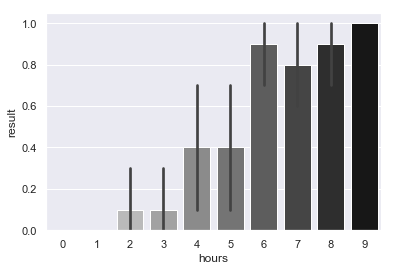

In [32]:
sns.barplot(x="hours", y="result",
           data=test_result, palette='gray_r')

勉強時間ごとの合格率を計算
- 1時間以下　全員不合格
- 9時間以上　全員合格

In [33]:
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


## ロジスティック回帰　実装

In [34]:
mod_glm = smf.glm(formula = "result ~ hours",
                 data = test_result,
                 family=sm.families.Binomial()).fit()

- 一般化線形モデル推定にはsmf.glm関数　ロジスティック回帰に限らず
- 引数の説明<br>formula　応答変数と説明変数<br>data　対象となるデータ<br>family　確率分布
- リンク関数を指定していないが、二項分布を指定した場合は自動でロジットになる<br>

## ロジスティック回帰の結果の出力　実装

- IRLS　反復重み付き最小二乗法　計算の繰り返し数がNo.Iterations
- DevianceとPearson chi2　モデルの当てはまり度　次章で詳しく
- 検定は正規モデルの解釈とほぼ一緒　t検定の代わりにWald検定

In [35]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Mon, 14 Jan 2019   Deviance:                       68.028
Time:                        19:35:40   Pearson chi2:                     84.9
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

## モデル選択　実装

- AICでNullモデルとどちらがいいか比較

In [36]:
mod_glm_null = smf.glm(formula = "result ~ 1",
                       data = test_result,
                       family=sm.families.Binomial()).fit()

- 勉強時間を説明変数に用いた方が良かった
- 勉強時間の係数が正　勉強時間と合格率は単純比例しそう

In [37]:
print("Nullモデル\t：", mod_glm_null.aic.round(3))
print("変数入りモデル\t：", mod_glm.aic.round(3))

Nullモデル	： 139.989
変数入りモデル	： 72.028


## ロジスティック回帰曲線の図示　実装

- ロジスティック回帰で求められた理論上の合格率を図示
- seabornのlmplot関数　引数logistic = True

- x_jitter　散布図のデータ点を少し上下にばらつかせる指定<br>合否データは2値なのでデータが重ならないように指定した

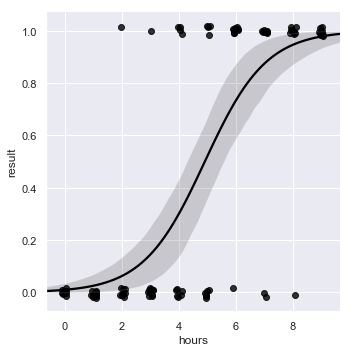

In [38]:
sns.lmplot(x="hours", y="result",
          data=test_result,
          logistic=True,
          scatter_kws={"color": "black"},
          line_kws={"color": "black"},
          x_jitter=0.1, y_jitter=0.02)

## 成功確率の予測　実装

- 無勉では1%
- 9時間以上で98%
- 仮に合否の2値で予測したいなら四捨五入したりね

In [39]:
# 0~9まで1ずつ増える等差数列
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 成功確率の予測値
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

---
---
---

## オッズ
- 失敗するよりも何倍成功しやすいか<br>オッズ$=\frac{p}{1-p}$

## オッズ比
- 異なるオッズ同士の比<br>$\displaystyle \frac{\frac{p_1}{1-p_1}}{\frac{p_2}{1-p_2}}$
- 対数オッズ比もある

## ロジスティック回帰の係数とオッズ比の関係
- ロジット関数　成功確率をオッズに変関する関数
- リンク関数=ロジット関数　ということは……<br>ロジスティック回帰の係数とオッズには密接な関係性
- $\displaystyle \log(\frac{p}{1-p})=\beta_0+\beta_1\times X$
- 回帰係数=説明変数を1単位変化させた時の対数オッズ比

In [57]:
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)
print(pred_1)

exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)
print(pred_2)

0    0.025836
dtype: float64
0    0.06292
dtype: float64


In [55]:
odds_1 = pred_1 / (1-pred_1)
odds_2 = pred_2 / (1-pred_2)
print(odds_1)
print("### odds_1{}".format(odds_1))
print("### odds_2{}".format(odds_2))
#
sp.log(odds_2 / odds_1)

0    0.026521
dtype: float64
### odds_10    0.026521
dtype: float64
### odds_20    0.067144
dtype: float64


array([0.929])

In [49]:
mod_glm.params["hours"]

0.9288901756284946

- 一致<br>変数を1単位動かした時のオッズ比<br>回帰係数

In [45]:
sp.exp(mod_glm.params["hours"])

2.5316978778757737

- 結論<br>説明変数が1単位増えたとき、対数オッズが何倍になるかが係数でわかる